In [512]:
%run -i ch04.py

<Figure size 432x288 with 0 Axes>

In [513]:
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor

from models import LinearRegressionModel
from pipelines import NumericPipeline
from const import PATH_SCREENSHOTS

In [514]:
theta = [4, 3]
count = 100
X, y = generate_data(theta, count)

In [515]:
theta = linear_fit(X, y)
theta

array([[4.2151],
       [2.7701]])

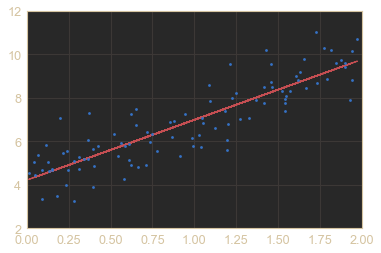

In [516]:
y_ = linear_predict(X, theta)
plt.plot(X, y_, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 2, 12])
plt.show()

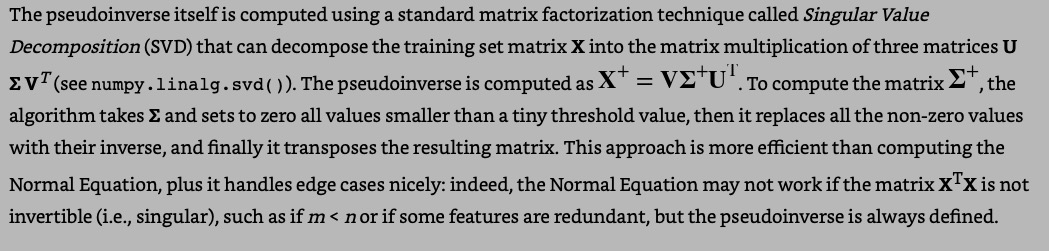

In [517]:
Image(f'{PATH_SCREENSHOTS}/ch04/svd_vs_ne.jpg', width=700)

<models.LinearRegressionModel object at 0x11f857f60>: LinearRegression,
size: 100, rmse: 0.90, mean: 0.90, std: 0.19,
theta: [4.2151, 2.7701], residuals: [80.6585], sigmas: [14.3702, 4.1196]


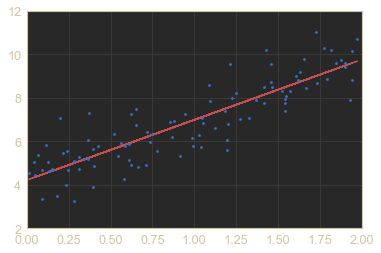

In [518]:
lr = LinearRegressionModel(LinearRegression)
lr.evaluate(X, y)
print(repr(lr))

plt.plot(X, lr.predictions, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 2, 12])
plt.show()

In [519]:
frame = pd.DataFrame(X)
X_ = NumericPipeline(frame).fit_transform(frame)

<models.LinearRegressionModel object at 0x11fceb518>: LinearRegression,
size: 100, rmse: 0.90, mean: 0.90, std: 0.19,
theta: [6.8200, 1.6399], residuals: [80.6585], sigmas: [10.0000, 10.0000]


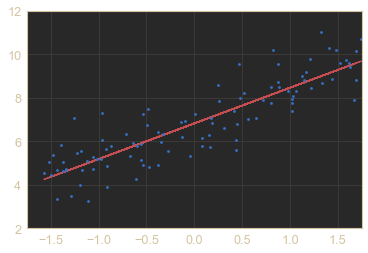

In [520]:
lrs = LinearRegressionModel(LinearRegression)
lrs.evaluate(*(X_, y))
print(repr(lrs))

plt.plot(X_, lrs.predictions, 'r-')
plt.plot(X_, y, 'b.')
plt.axis([-1.75, 1.75, 2, 12])
plt.show()

In [521]:
index = np.array(range(10)) * 10 + 1
pred = lr.model.predict(X[index])
pred_ = lrs.model.predict(X_[index])
import math
view = np.c_[
    X[index], y[index], pred.round(4), 
    X_[index], y[index], pred_.round(4)
]
frame = pd.DataFrame(view)
frame.index = index
frame.columns = ['X', 'y', 'Pred', 'X_', 'y', 'Pred_']
frame

,X,y,Pred,X_,y,Pred_
1,1.901429,9.405278,9.4823,1.623434,9.405278,9.4823
11,1.939820,10.148210,9.5886,1.688284,10.148210,9.5886
21,0.278988,5.098018,4.9879,-1.117192,5.098018,4.9879
31,0.341048,5.197723,5.1598,-1.012360,5.197723,5.1598
41,0.990354,5.802383,6.9585,0.084447,5.802383,6.9585
51,1.550266,8.084499,8.5095,1.030250,8.084499,8.5095
61,0.542698,5.306033,5.7184,-0.671733,5.306033,5.7184
71,0.397431,3.871837,5.3160,-0.917117,3.871837,5.3160
81,1.246596,8.213622,7.6683,0.517292,8.213622,7.6683
91,1.426490,10.176262,8.1666,0.821167,10.176262,8.1666


In [522]:
theta_ne = linear_fit(X, y, algo=METHOD_NE)
theta_svd = linear_fit(X, y, algo=METHOD_SVD)
theta_bgd, path_bgd = linear_fit(X, y, algo=METHOD_BGD, tolerance=0.001)
theta_sgd, path_sgd = linear_fit(X, y, algo=METHOD_SGD, epochs=50, lr=0.1)
theta_mbgd, path_mbgd = linear_fit(X, y, algo=METHOD_MBGD, batch=10)

array = np.array([
    theta_ne.flatten(), 
    theta_svd.flatten(), 
    theta_bgd.flatten(), 
    theta_sgd.flatten(), 
    theta_mbgd.flatten()
]).T
frame = pd.DataFrame(array)
frame.columns = ['ne', 'svd', 'bgd', 'sgd', 'mbgd']
frame

,ne,svd,bgd,sgd,mbgd
0,4.215096,4.215096,4.212992,4.128694,4.256427
1,2.770113,2.770113,2.771971,2.688538,2.798984


In [523]:
lr = LinearRegressionModel(SGDRegressor, max_iter=1000, tol=1e-3)
lr.evaluate(X, y.ravel())
print(repr(lr))

<models.LinearRegressionModel object at 0x11f8570b8>: SGDRegressor,
size: 100, rmse: 0.92, mean: 0.92, std: 0.21,
theta: [4.2151, 2.7701], residuals: [80.6585], sigmas: [14.3702, 4.1196]


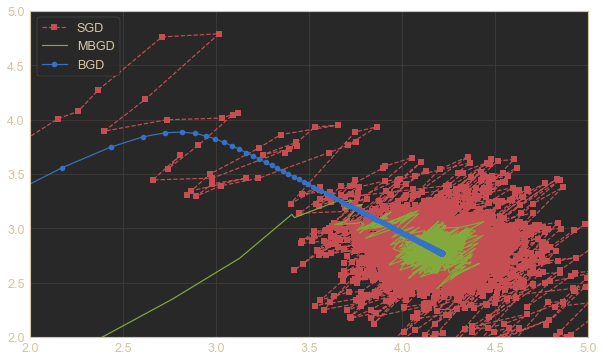

In [534]:
plt.figure(figsize=(10, 6))
plt.plot(path_sgd[:,0], path_sgd[:,1], 'rs--', label='SGD')
plt.plot(path_mbgd[:,0], path_mbgd[:,1], 'g-', label='MBGD')
plt.plot(path_bgd[:,0], path_bgd[:,1], 'bo-', label='BGD')
plt.axis([2, 5, 2, 5])
plt.legend(loc='upper left')
plt.show()